Pseudocode

1. Import necessary libraries
1. Read the data
1. Assign the features and the targets
1. train validation test split 60/20/20
1. Build a pipeline with standard scaler then linear ridge regression
1. Set 10 different regularizations
1. find the regularization with the highest accuracy on the **validation data**
1. make one final evaluation on the test data with that regularization
1. What is the best model’s coefficients, intercept, and its training, validation, and test accuracy? 
1. What are the top 5 features from X1 to X8?
1. If you repeat the procedure with only the 5 features, what are the results?
1. Based on your results for this Problem, what insights did you gain?




In [25]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the standard scaler and ridge regression modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [26]:
# import dataset
df = pd.read_excel('ENB2012_data.xlsx') 
# print(df.head())

x = df.iloc[:,0:8]
y = df.iloc[:,8:10]


x, y

(       X1     X2     X3      X4   X5  X6   X7  X8
 0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
 1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
 2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
 3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
 4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
 ..    ...    ...    ...     ...  ...  ..  ...  ..
 763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
 764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
 765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
 766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
 767  0.62  808.5  367.5  220.50  3.5   5  0.4   5
 
 [768 rows x 8 columns],
         Y1     Y2
 0    15.55  21.33
 1    15.55  21.33
 2    15.55  21.33
 3    15.55  21.33
 4    20.84  28.28
 ..     ...    ...
 763  17.88  21.40
 764  16.54  16.88
 765  16.44  17.11
 766  16.48  16.61
 767  16.64  16.03
 
 [768 rows x 2 columns])

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

df = pd.read_excel('ENB2012_data.xlsx')
X = df.iloc[:,0:8]
y = df.iloc[:,8:10]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

model = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=3),
                      Ridge(alpha=0.01)).fit(X_train, y_train)

model.score(X_train, y_train)

0.9886849519980989

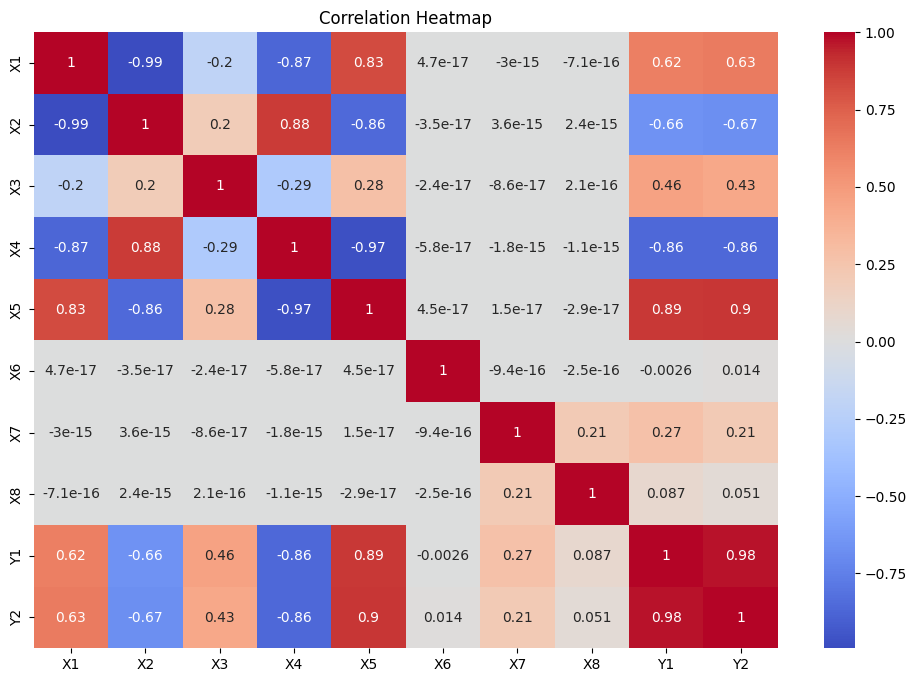

In [27]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.

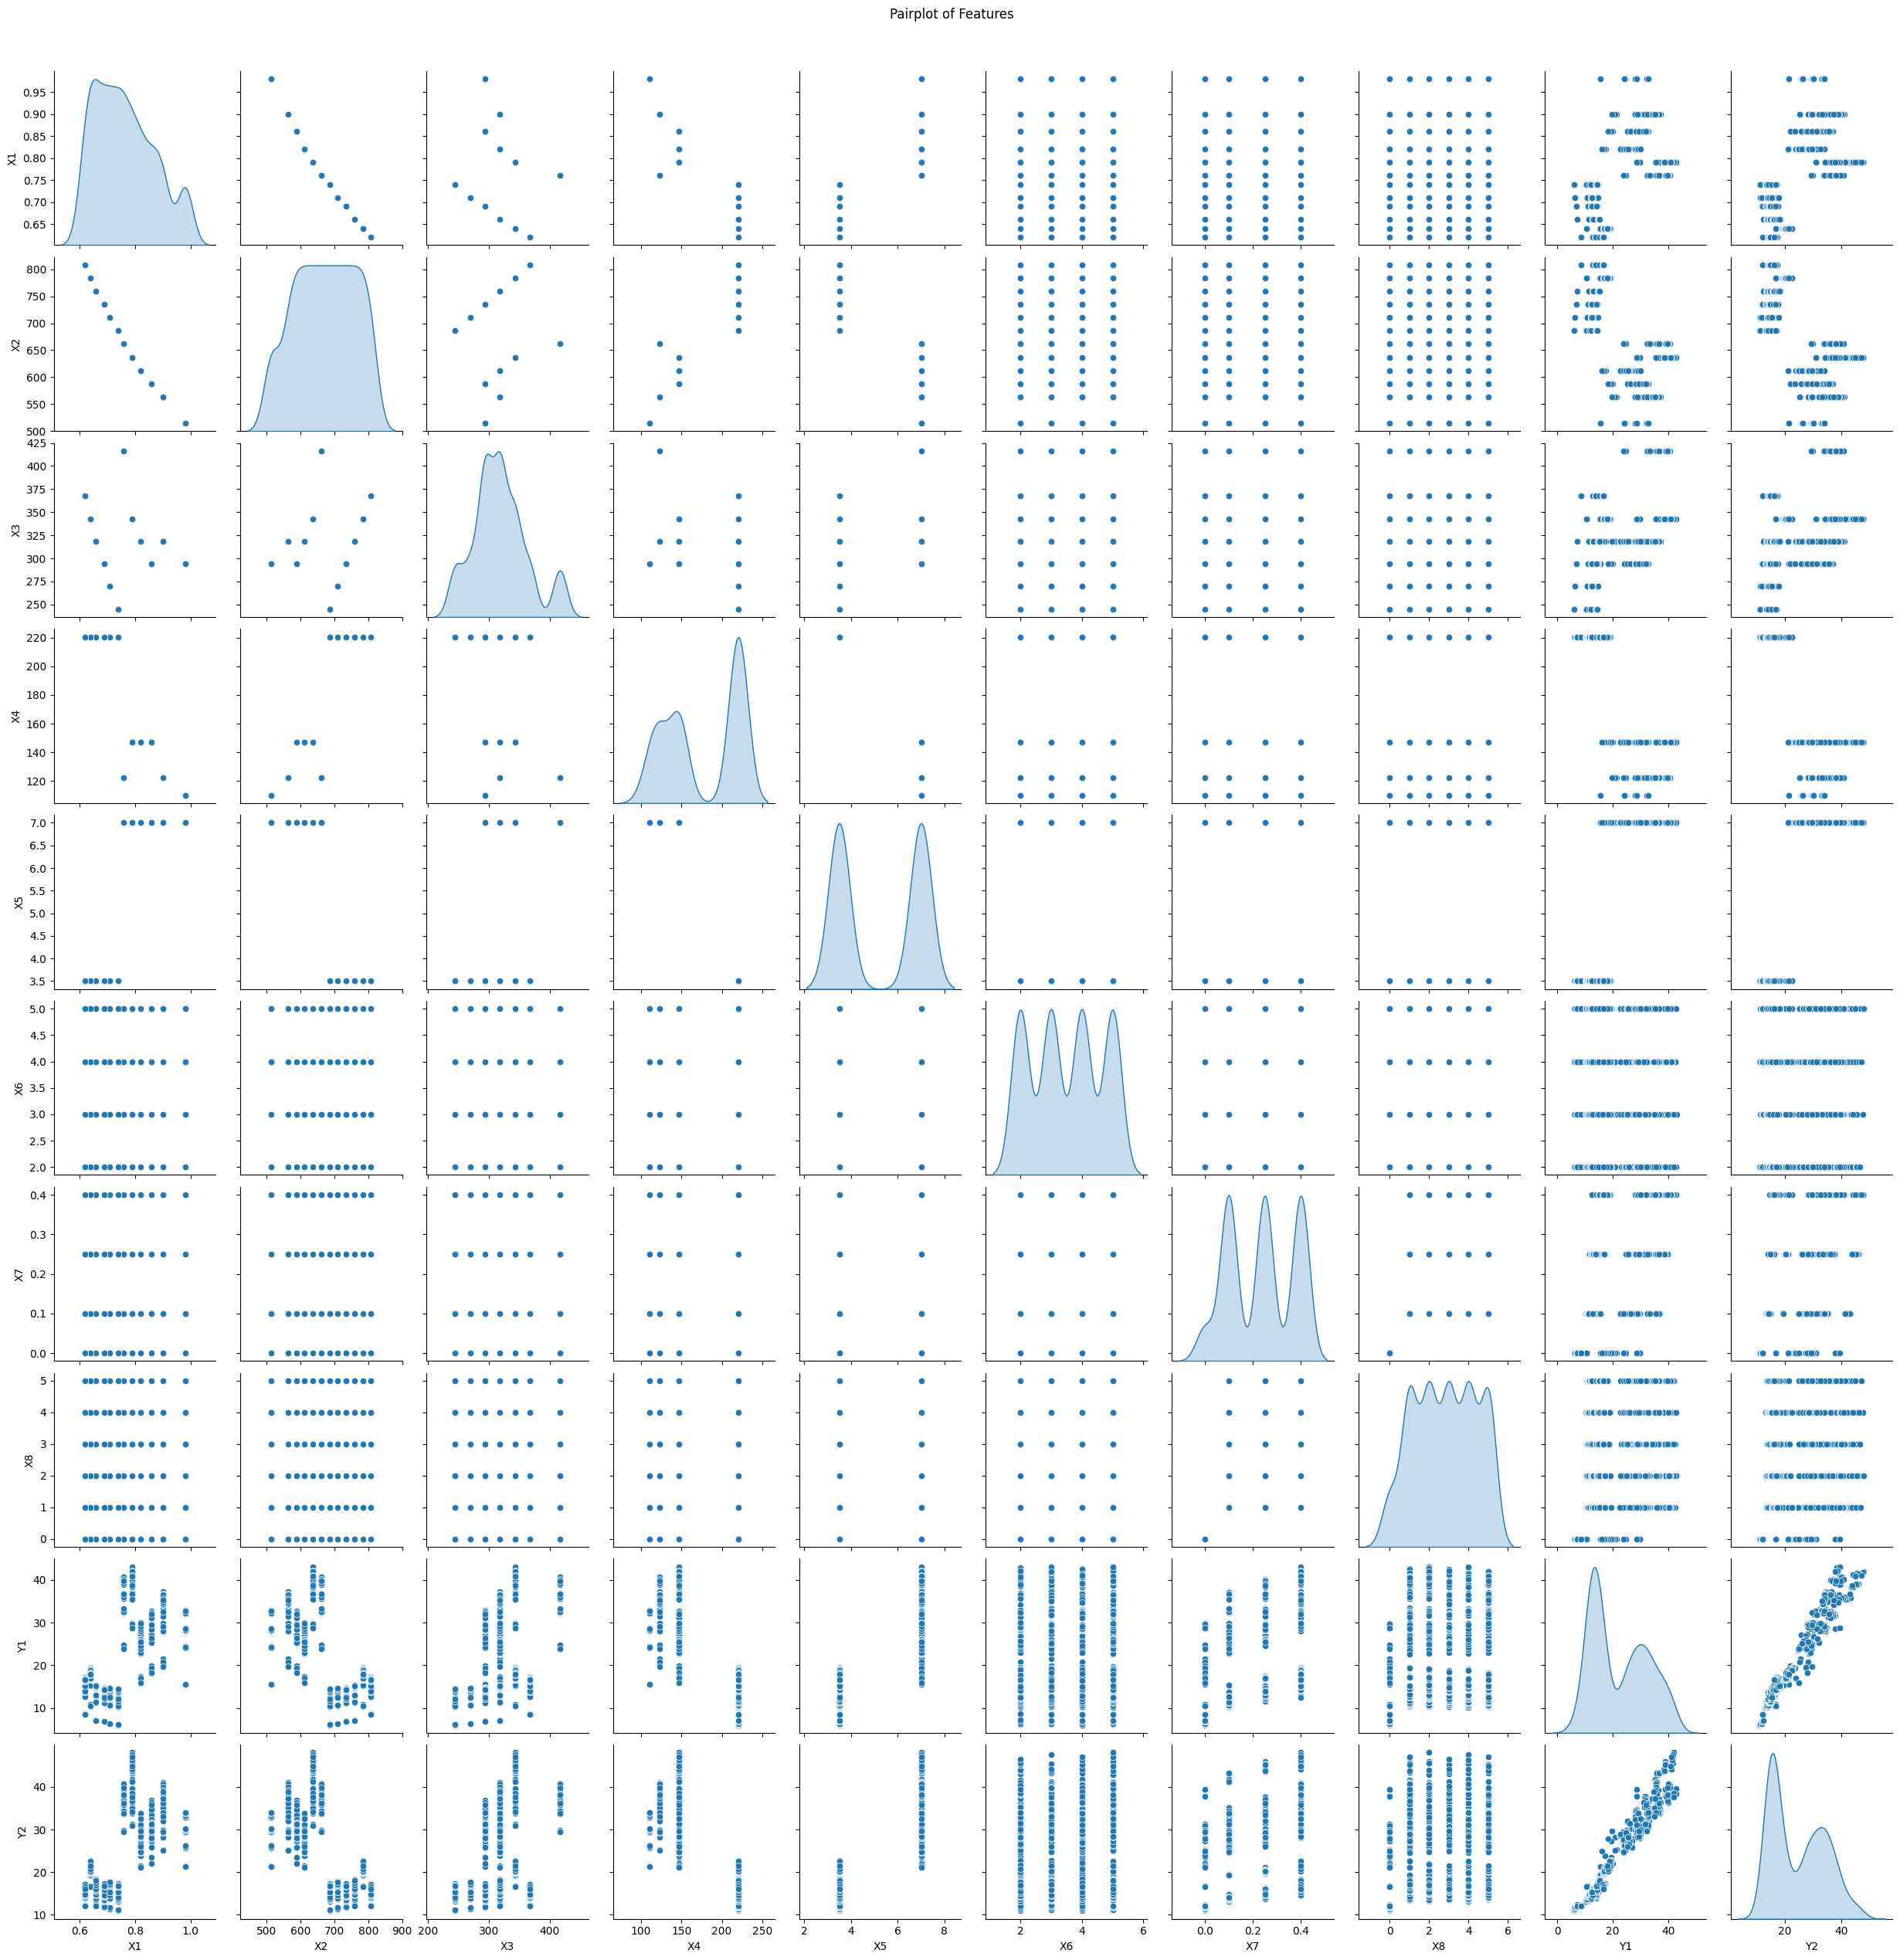

In [28]:
sns.pairplot(df, diag_kind="kde")
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=69) # 60% training and 40% test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69) # 20% test and 20% validation 

# model = make_pipeline(StandardScaler(),
#                        Ridge(alpha=0.046415888336127774)).fit(X_train,y_train)

# train_R2 = model.score(X_train, y_train)
# val_R2 = model.score(X_val, y_val)
# test_R2 = model.score(X_test, y_test)
# print(f"\tCoefficients: {model[1].coef_}") 
# print(f"\tIntercept: {model[1].intercept_}")
# print(f"\tTraining accuracy (R2): {train_R2}")
# print(f"\tValidation accuracy (R2): {val_R2}")
# print(f"\tTest accuracy (R2): {test_R2}")

# 10 alpha values to test
alphas = np.logspace(-10, 10, 10)
models = []

for alpha in alphas:
    model = make_pipeline(StandardScaler(),
                       Ridge(alpha=alpha)).fit(X_train,y_train)
    train_R2 = model.score(X_train, y_train)
    val_R2 = model.score(X_val, y_val)
    test_R2 = model.score(X_test, y_test)
    print(f"Alpha: {alpha}")
    print(f"\tCoefficients: {model[1].coef_}") 
    print(f"\tIntercept: {model[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")

    data = {
        "model": model,
        "alpha": alpha,
        "coef": model[1].coef_,
        "intercept": model[1].intercept_,
        "train_R2": train_R2,
        "val_R2": val_R2
    }

    models.append(data)

Alpha: 1e-10
	Coefficients: [[-6.24666645 -3.1458732   0.76604585 -3.53321242  7.78111768 -0.11350448
   2.72037599  0.52398813]
 [-8.3171355  -4.54979712  0.12413103 -4.59608114  6.88746876  0.10831587
   1.9346141   0.28591898]]
	Intercept: [22.53993478 24.80102174]
	Training accuracy (R2): 0.8912066461492637
	Validation accuracy (R2): 0.9165302782426359
Alpha: 1.6681005372000592e-08
	Coefficients: [[-6.24666641 -3.16512136  0.77496273 -3.51390651  7.78111769 -0.11350448
   2.72037599  0.52398813]
 [-8.31713545 -4.55092048  0.12465146 -4.59495435  6.88746878  0.10831587
   1.9346141   0.28591898]]
	Intercept: [22.53993478 24.80102174]
	Training accuracy (R2): 0.8912066461492637
	Validation accuracy (R2): 0.9165302782481528
Alpha: 2.782559402207126e-06
	Coefficients: [[-6.24666092 -3.16525774  0.77502848 -3.51376275  7.78111923 -0.11350446
   2.72037597  0.52398812]
 [-8.31712702 -4.55094368  0.12466615 -4.59491999  6.88747158  0.1083159
   1.93461409  0.28591897]]
	Intercept: [22.539

c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-pack

In [30]:
# Find the model with the highest validation R2
best_model = max(models, key=lambda x: x['val_R2'])

# Print details of the best model
print(f"Alpha for best model: {best_model['model'].named_steps['ridge'].alpha}")
print(f"Coefficients for best model: {best_model['model'][1].coef_}")
print(f"Intercept for best model: {best_model['model'][1].intercept_}")
print(f"Training R2 for best model: {best_model['train_R2']}")
print(f"Validation R2 for best model: {best_model['val_R2']}")


Alpha for best model: 0.07742636826811278
Coefficients for best model: [[-6.09856029 -3.06641812  0.79847938 -3.42604822  7.82167186 -0.113
   2.71998762  0.52380486]
 [-8.09034682 -4.39423256  0.158198   -4.45416459  6.9618618   0.10906997
   1.93442837  0.2856282 ]]
Intercept for best model: [22.53993478 24.80102174]
Training R2 for best model: 0.8912031924642906
Validation R2 for best model: 0.9165521355167593


In [31]:
# print all the models and their validation R2s
for model in models:
    print(f"Alpha: {model['alpha']}\tValidation R2: {model['val_R2']}")

Alpha: 1e-10	Validation R2: 0.9165302782426359
Alpha: 1.6681005372000592e-08	Validation R2: 0.9165302782481528
Alpha: 2.782559402207126e-06	Validation R2: 0.9165302791684258
Alpha: 0.0004641588833612782	Validation R2: 0.9165304325282212
Alpha: 0.07742636826811278	Validation R2: 0.9165521355167593
Alpha: 12.915496650148826	Validation R2: 0.9154390709102668
Alpha: 2154.4346900318865	Validation R2: 0.5273282342996092
Alpha: 359381.36638046405	Validation R2: 0.003487253004942903
Alpha: 59948425.03189421	Validation R2: -0.0030590920239101926
Alpha: 10000000000.0	Validation R2: -0.003098584172469221


In [32]:
# Sort models by alpha
sorted_models = sorted(models, key=lambda x: x['val_R2'], reverse=True)

# Print sorted models
for model in sorted_models:
    print(f"Alpha: {model['alpha']}\tValidation R2: {model['val_R2']}")

    
for model in sorted_models:
    print(f"Model: {model['model']}")


Alpha: 0.07742636826811278	Validation R2: 0.9165521355167593
Alpha: 0.0004641588833612782	Validation R2: 0.9165304325282212
Alpha: 2.782559402207126e-06	Validation R2: 0.9165302791684258
Alpha: 1.6681005372000592e-08	Validation R2: 0.9165302782481528
Alpha: 1e-10	Validation R2: 0.9165302782426359
Alpha: 12.915496650148826	Validation R2: 0.9154390709102668
Alpha: 2154.4346900318865	Validation R2: 0.5273282342996092
Alpha: 359381.36638046405	Validation R2: 0.003487253004942903
Alpha: 59948425.03189421	Validation R2: -0.0030590920239101926
Alpha: 10000000000.0	Validation R2: -0.003098584172469221
Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.07742636826811278))])
Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.0004641588833612782))])
Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=2.782559402207126e-06))])
Model: Pipeline(steps=[('s

In [33]:
from sklearn.model_selection import GridSearchCV


# Define a pipeline
pipe = make_pipeline(StandardScaler(), Ridge())

# Define the search space for hyperparameters
param_grid = {
    'ridge__alpha': np.logspace(-4, 4, 10)  # Alpha values to try
}

# Create the grid search with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=8, scoring='neg_mean_squared_error')

# Fit the model
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best model
best_model = grid.best_estimator_

best_params, best_model



c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-pack

({'ridge__alpha': 0.046415888336127774},
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=0.046415888336127774))]))

In [34]:
best_model.score(X_test, y_test)

c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Geyzson Kristoffer\AppData\Local\Programs\Python\Python311\Lib\site-pack

0.9139692040086327